In [2]:
import numpy as np
import cv2
from scipy.misc import imread
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
img = imread('/data/comp-vision/curved-lane.jpg')
print(img.shape)

(720, 1280, 3)


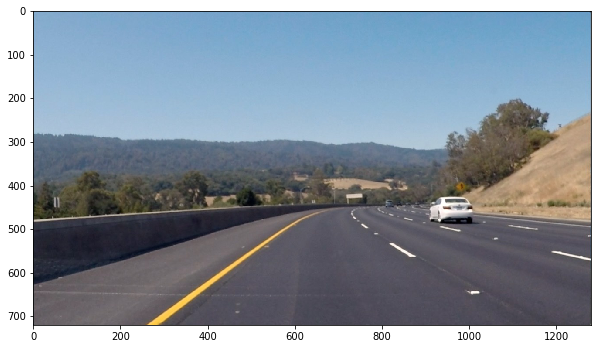

In [15]:
plt.figure(figsize=(10, 6))
plt.imshow(img)

In [16]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(gray.shape)

(720, 1280)


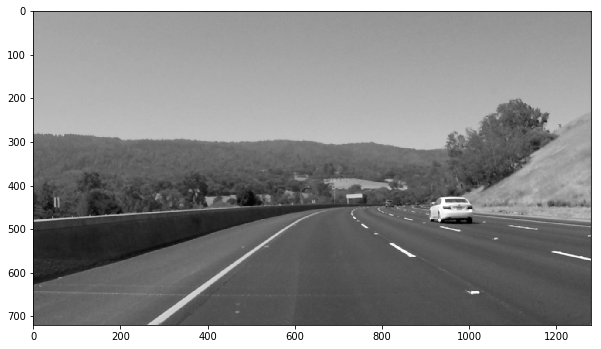

In [18]:
plt.figure(figsize=(10, 6))
plt.imshow(gray, cmap='gray')

## Sobel X

In [38]:
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)

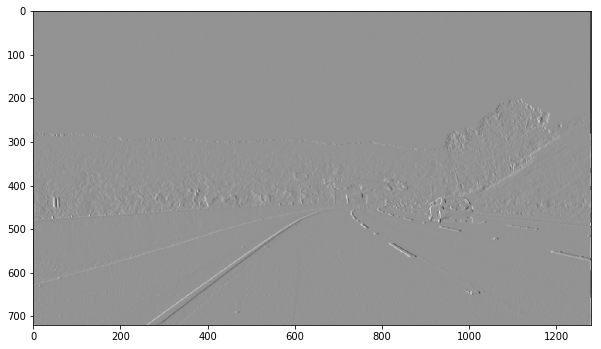

In [39]:
plt.figure(figsize=(10, 6))
plt.imshow(sobelx, cmap='gray')

In [40]:
print(np.min(sobelx), np.max(sobelx))

-768.0 567.0


In [41]:
abs_sobelx = np.absolute(sobelx)
print(np.min(abs_sobelx), np.max(abs_sobelx))

0.0 768.0


In [47]:
scaled_sobelx = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
print(np.min(scaled_sobelx), np.max(scaled_sobelx), scaled_sobelx.dtype)

0 255 uint8


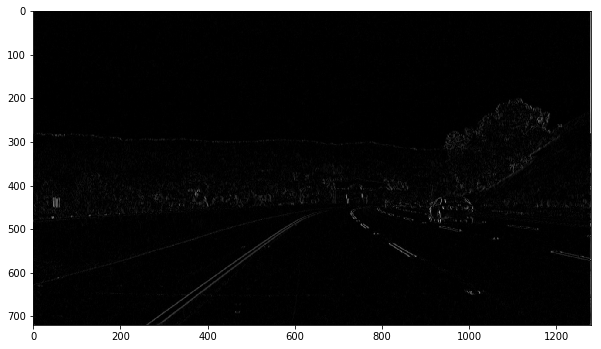

In [50]:
plt.figure(figsize=(10, 6))
plt.imshow(scaled_sobelx, cmap='gray')

In [52]:
sxbin = np.zeros_like(scaled_sobelx)
sxbin[(scaled_sobelx >= 20) & (scaled_sobelx <= 100)] = 1

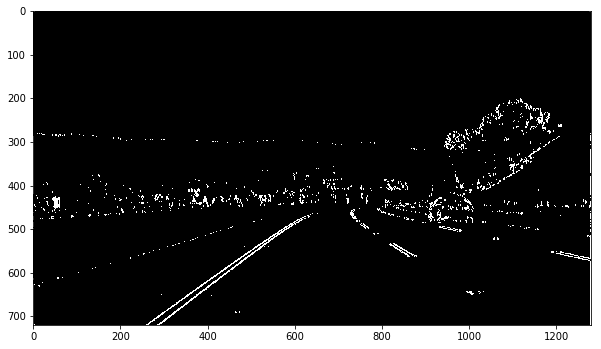

In [54]:
plt.figure(figsize=(10, 6))
plt.imshow(sxbin, cmap='gray')

## Sobel Y

In [56]:
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
abs_sobely = np.absolute(sobely)
scaled_sobely = np.uint8(255*abs_sobely/np.max(abs_sobely))
sybin = np.zeros_like(scaled_sobely)
sybin[(scaled_sobely >= 20) & (scaled_sobely <= 100)] = 1

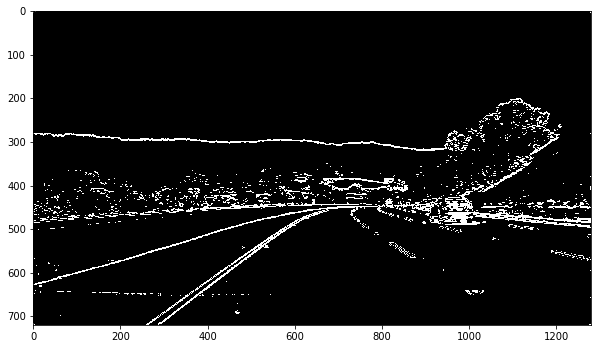

In [57]:
dplt.figure(figsize=(10, 6))
plt.imshow(sybin, cmap='gray')

## Sobel XY

In [72]:
def grad(imgpath, kernel, thresh):
    img = imread(imgpath)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=kernel)
    abs_sobel = np.sqrt(np.square(sobelx) + np.square(sobely))
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    sbin = np.zeros_like(scaled_sobel)
    sbin[(scaled_sobel >= thresh[0])  & (scaled_sobel <= thresh[1])] = 1
    return sbin


grad_img = grad('/data/comp-vision/curved-lane.jpg', 5, (30, 200))

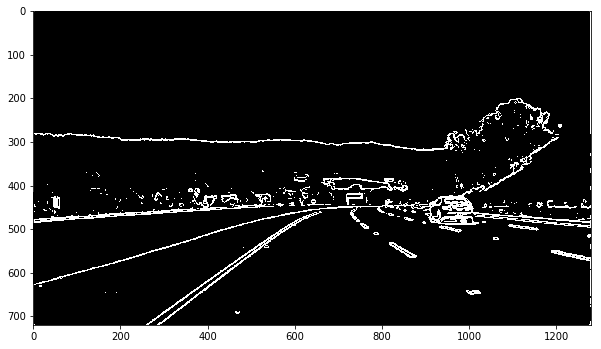

In [73]:
plt.figure(figsize=(10, 6))
plt.imshow(grad_img, cmap='gray')

## Direction of Gradient

In [78]:
def grad_dir(imgpath, kernel, thresh):
    img = imread(imgpath)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=kernel)
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    dirgrad = np.arctan2(abs_sobely, abs_sobelx)
    binout = np.zeros_like(dirgrad)
    binout[(dirgrad >= thresh[0]) & (dirgrad <= thresh[1])] = 1
    return binout


newimg = grad_dir('/data/comp-vision/curved-lane.jpg', 9, (0.7, 1.3))    

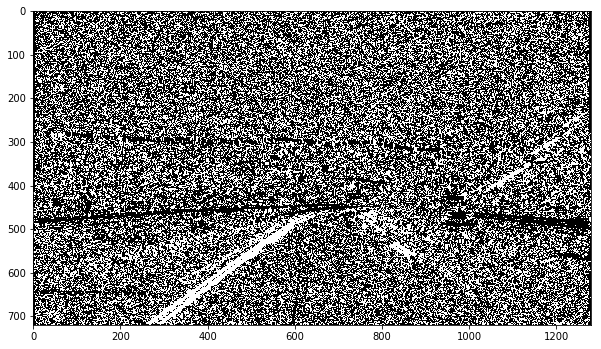

In [79]:
plt.figure(figsize=(10, 6))
plt.imshow(newimg, cmap='gray')

In [76]:
np.pi/2

1.5707963267948966